# Prawdopodobieństwo

In [1]:
import random
def random_kid():
    return random.choice(["boy", "girl"])
random_kid()

'girl'

### rozład jednostajny

In [2]:
def uniform_pdf(x):
    if x >= 0 and x < 1:
        return 1
    else:
        return 0
uniform_pdf(2)

0

In [3]:
def uniform_cdf(x):
    """Zwraca prawdopodobieństwo tego, że zmienna rozkładu jednostajnego jest <= 1"""
    if x < 0: return 0
    elif x < 1: return x
    else: return 1
uniform_cdf(0.5)

0.5

### rozkład normalny

In [4]:
import math
def normal_pdf(x, mi=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mi) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))
normal_pdf(0)

0.3989422804014327

In [5]:
import matplotlib.pyplot as plt
def plot_normal_pdfs(plt):
    xs = [x / 10 for x in range(-100, 50)]
    plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mi=0, sigma=1')
    plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mi=0, sigma=2')
    plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mi=0, sigma=0.5')
    plt.plot(xs, [normal_pdf(x, mi=-1) for x in xs], '-.', label='mi=-1, sigma=1')
    plt.legend()
    plt.show()
plot_normal_pdfs(plt)

<Figure size 640x480 with 1 Axes>

### dystrybuanta rozkładu normalnego

In [6]:
def normal_cdf(x, mi=0, sigma=1):
    return (1 + math.erf((x - mi) / math.sqrt(2) / sigma)) / 2
normal_cdf(3)

0.9986501019683699

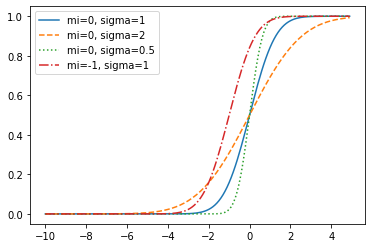

In [7]:
def plot_normal_cdfs(plt):
    xs = [x / 10.0 for x in range(-100, 50)]
    plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mi=0, sigma=1')
    plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mi=0, sigma=2')
    plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mi=0, sigma=0.5')
    plt.plot(xs, [normal_cdf(x, mi=-1) for x in xs], '-.', label='mi=-1, sigma=1')
    plt.legend(loc=2) # top left
    plt.show()
plot_normal_cdfs(plt)

### odwrotność dystrybuanty rozkładu normalnego

In [8]:
def inverse_normal_cdf(p, mi=0, sigma=1, tolerance=0.00001):
    '''Znajduje przybliżoną wartość odwrotności przy użyciu algorytmu wyszukiwania zwrotnego'''
    if mi != 0 or sigma != 1:
        return mi + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            '''Punkt środkowy znajduje się za nisko, szukaj nad nim'''
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            '''Punkt środkowy znajduje się za wysoko, szukaj pod nim'''
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z
inverse_normal_cdf(1)

8.75

### centralne twierdzenie graniczne

In [9]:
def bernouli_trial(p):
    return 1 if random.random() < p else 0

bernouli_trial(0.5)

1

In [10]:
random.random()

0.7501407516046683

In [11]:
def binominal(p, n):
    return sum(bernouli_trial(p) for _ in range(n))
binominal(0.9, 1000)

897

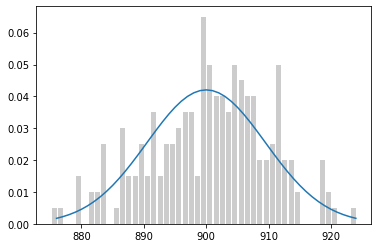

In [12]:
from collections import Counter
def make_hist(p, n, num_points):
    
    data = [binominal(p, n) for _ in range(num_points)]
    
    '''Przedstawia próbki dwumianu na wykresie słupkowym'''
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()], 
           [v / num_points for v in histogram.values()], 
           0.8, color='0.8')
    mi = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    '''Przybliżenie rozkładu normalnego na wykresie'''
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mi, sigma) - normal_cdf(i - 0.5, mi, sigma)
         for i in xs]
    plt.plot(xs, ys)
    plt.show()
make_hist(0.9, 1000, 200)

## Prawdopodobieństwo warunkowe

In [13]:
if __name__=="__main__":

    both_girls = 0
    older_girl = 0
    either_girl = 0

#     random.seed(0)
    for _ in range(10000):
        younger = random_kid()
        older = random_kid()
        if older == 'girl':
            older_girl += 1
        if older == 'girl' and younger == 'girl':
            both_girls += 1
        if older == 'girl'or younger == 'girl':
            either_girl += 1
    print("P(obydwoje | starsze):", both_girls / older_girl)
    print("P(obydwoje | którekolwiek):", both_girls / either_girl)


P(obydwoje | starsze): 0.5070365902694008
P(obydwoje | którekolwiek): 0.33766233766233766
